# Analisis Eksploratif Data Spotify

Pada artikel ini, kita akan melakukan analisis eksploratif pada dataset `Spotify`. `Spotify`  Merupakan dataset yang berisikan daftar lagu dan fitur audio dari band/penyanyi ternama dunia, antara lain: Queens, Maroon 5, dan Jason Mraz.

Kolom-kolom pada dataset tersebut, antara lain:

* `id` : nomor seri lagu
*  `name` : judul lagu
* `popularity` : tingkat popularitas lagu
* `album.id` : nomor seri album
* `album.name` : nama album
* `album.total_tracks` : total lagu dalam album
* `track_number` : nomor lagu dalam album
* `duration_ms` : durasi lagu dalam satuan ms
* `danceability` : elemen musik termasuk tempo, stabilitas ritme, kekuatan beat, dan keteraturan keseluruhan. Nilai 0,0 paling tidak bisa digunakan untuk menari dan 1,0 paling bisa digunakan untuk menari.
* `energy` : Energi adalah ukuran dari 0,0 hingga 1,0 dan mewakili ukuran persepsi intensitas dan aktivitas. Biasanya, trek yang energik terasa cepat, keras, dan berisik. Sebagai contoh, death metal memiliki energi tinggi, sedangkan prelude Bach mendapat skor rendah pada skala. Fitur perseptual yang berkontribusi pada atribut ini meliputi rentang dinamis, persepsi kenyaringan, warna nada, onset rate, dan entropi umum.
* `key` : Kunci dari trek adalah. Integer memetakan ke pitch menggunakan notasi Pitch Class standar. Misalnya. 0 = C, 1 = C♯ / D ♭, 2 = D, dan seterusnya.
* `loudness` : Keseluruhan kenyaringan trek dalam desibel (dB). Nilai kenyaringan rata-rata di seluruh trek dan berguna untuk membandingkan kenyaringan relatif trek. Kenyaringan adalah kualitas suara yang merupakan korelasi psikologis utama dari kekuatan fisik (amplitudo). Nilai kisaran khas antara -60 dan 0 db.
* `mode` : Mode menunjukkan modalitas (besar atau kecil) dari suatu trek, jenis skala dari mana konten melodinya diturunkan. Mayor diwakili oleh 1 dan minor adalah 0.
* `speechiness` : Speechiness mendeteksi keberadaan kata-kata yang diucapkan di trek. Semakin eksklusif pidato-seperti rekaman (mis. Acara bincang-bincang, buku audio, puisi), semakin dekat dengan 1.0 nilai atribut. Nilai di atas 0,66 menggambarkan trek yang mungkin seluruhnya terbuat dari kata-kata yang diucapkan. Nilai antara 0,33 dan 0,66 menggambarkan trek yang mungkin berisi musik dan ucapan, baik dalam bagian atau lapisan, termasuk kasus-kasus seperti musik rap. Nilai di bawah 0,33 kemungkinan besar mewakili musik dan trek non-ucapan lainnya.
* `acousticness` : Ukuran kepercayaan dari 0,0 hingga 1,0 dari apakah trek akustik. 1.0 mewakili kepercayaan tinggi trek adalah akustik.
* `instrumentalness` : Memprediksi apakah suatu lagu tidak mengandung vokal. Suara “Ooh” dan “aah” diperlakukan sebagai instrumen dalam konteks ini. Rap atau trek kata yang diucapkan jelas "vokal". Semakin dekat nilai instrumentalness ke 1.0, semakin besar kemungkinan trek tidak mengandung konten vokal. Nilai di atas 0,5 dimaksudkan untuk mewakili trek instrumental, tetapi kepercayaan diri lebih tinggi ketika nilai mendekati 1.0.
* `liveness` : Mendeteksi keberadaan audiens dalam rekaman. Nilai liveness yang lebih tinggi mewakili probabilitas yang meningkat bahwa trek dilakukan secara langsung. Nilai di atas 0,8 memberikan kemungkinan kuat bahwa trek direkam saat live concert.
* `valence` : Ukuran 0,0 hingga 1,0 yang menggambarkan kepositifan musik yang disampaikan oleh sebuah trek. Lagu dengan valensi tinggi terdengar lebih positif (mis. Bahagia, ceria, gembira), sedangkan trek dengan valensi rendah terdengar lebih negatif (mis. Sedih, tertekan, marah).
* `tempo` : Perkiraan tempo trek secara keseluruhan dalam beat per menit (BPM). Dalam terminologi musik, tempo adalah kecepatan atau kecepatan dari bagian yang diberikan dan diturunkan langsung dari durasi beat rata-rata.
* `time_signature` : An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [1]:
# Import Packages pandas, seaborn, matplotlib.pyplot, numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# import dataset (ganti ___ dengan perintah yang sesuai)
data = pd.read_csv("spotify.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1225 non-null   object 
 1   name                1225 non-null   object 
 2   popularity          1225 non-null   int64  
 3   album.id            1225 non-null   object 
 4   album.name          1225 non-null   object 
 5   album.total_tracks  1225 non-null   int64  
 6   track_number        1225 non-null   int64  
 7   duration_ms         1225 non-null   int64  
 8   danceability        1225 non-null   float64
 9   energy              1225 non-null   float64
 10  key                 1225 non-null   object 
 11  loudness            1225 non-null   float64
 12  mode                1225 non-null   object 
 13  speechiness         1225 non-null   float64
 14  acousticness        1225 non-null   float64
 15  instrumentalness    1225 non-null   float64
 16  livene

In [4]:
data.head()

id                        name  ...  time_signature    artist
0  3I1JTx525DKElzlTYOBfZN                    Best 4 U  ...               4  Maroon 5
1  0GxQ1A5L9xnMOytbP6eKBG  What Lovers Do (feat. SZA)  ...               4  Maroon 5
2  3T9CfDxFYqZWSKxd0BhZrb                        Wait  ...               4  Maroon 5
3  6SEBdRAW54AFwa8spgf0Ws                 Lips On You  ...               4  Maroon 5
4  0RqTAf0gX3pXAJYAbYRDqA                Bet My Heart  ...               4  Maroon 5

[5 rows x 21 columns]

## 1. Analisis Distribusi Data Numerik

Buatlah visualisasi sebuah data numerik yang ada pada dataset dan ceritakan hasil visualisasi yang muncul!

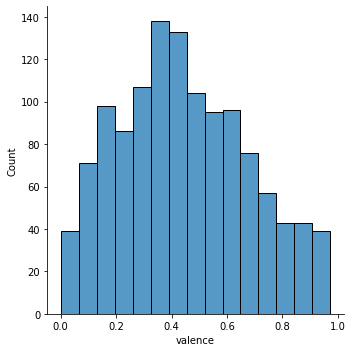

In [9]:
# visualisasi data dengan distplot
sns.displot(data.valence)
plt.show()

## 2. Analisis Korelasi dengan Scatterplot Matrices

Buatlah scatterplot matrices untuk melihat korelasi antar variabel numerik dan ceritakan temuan menarik yang anda temui! 

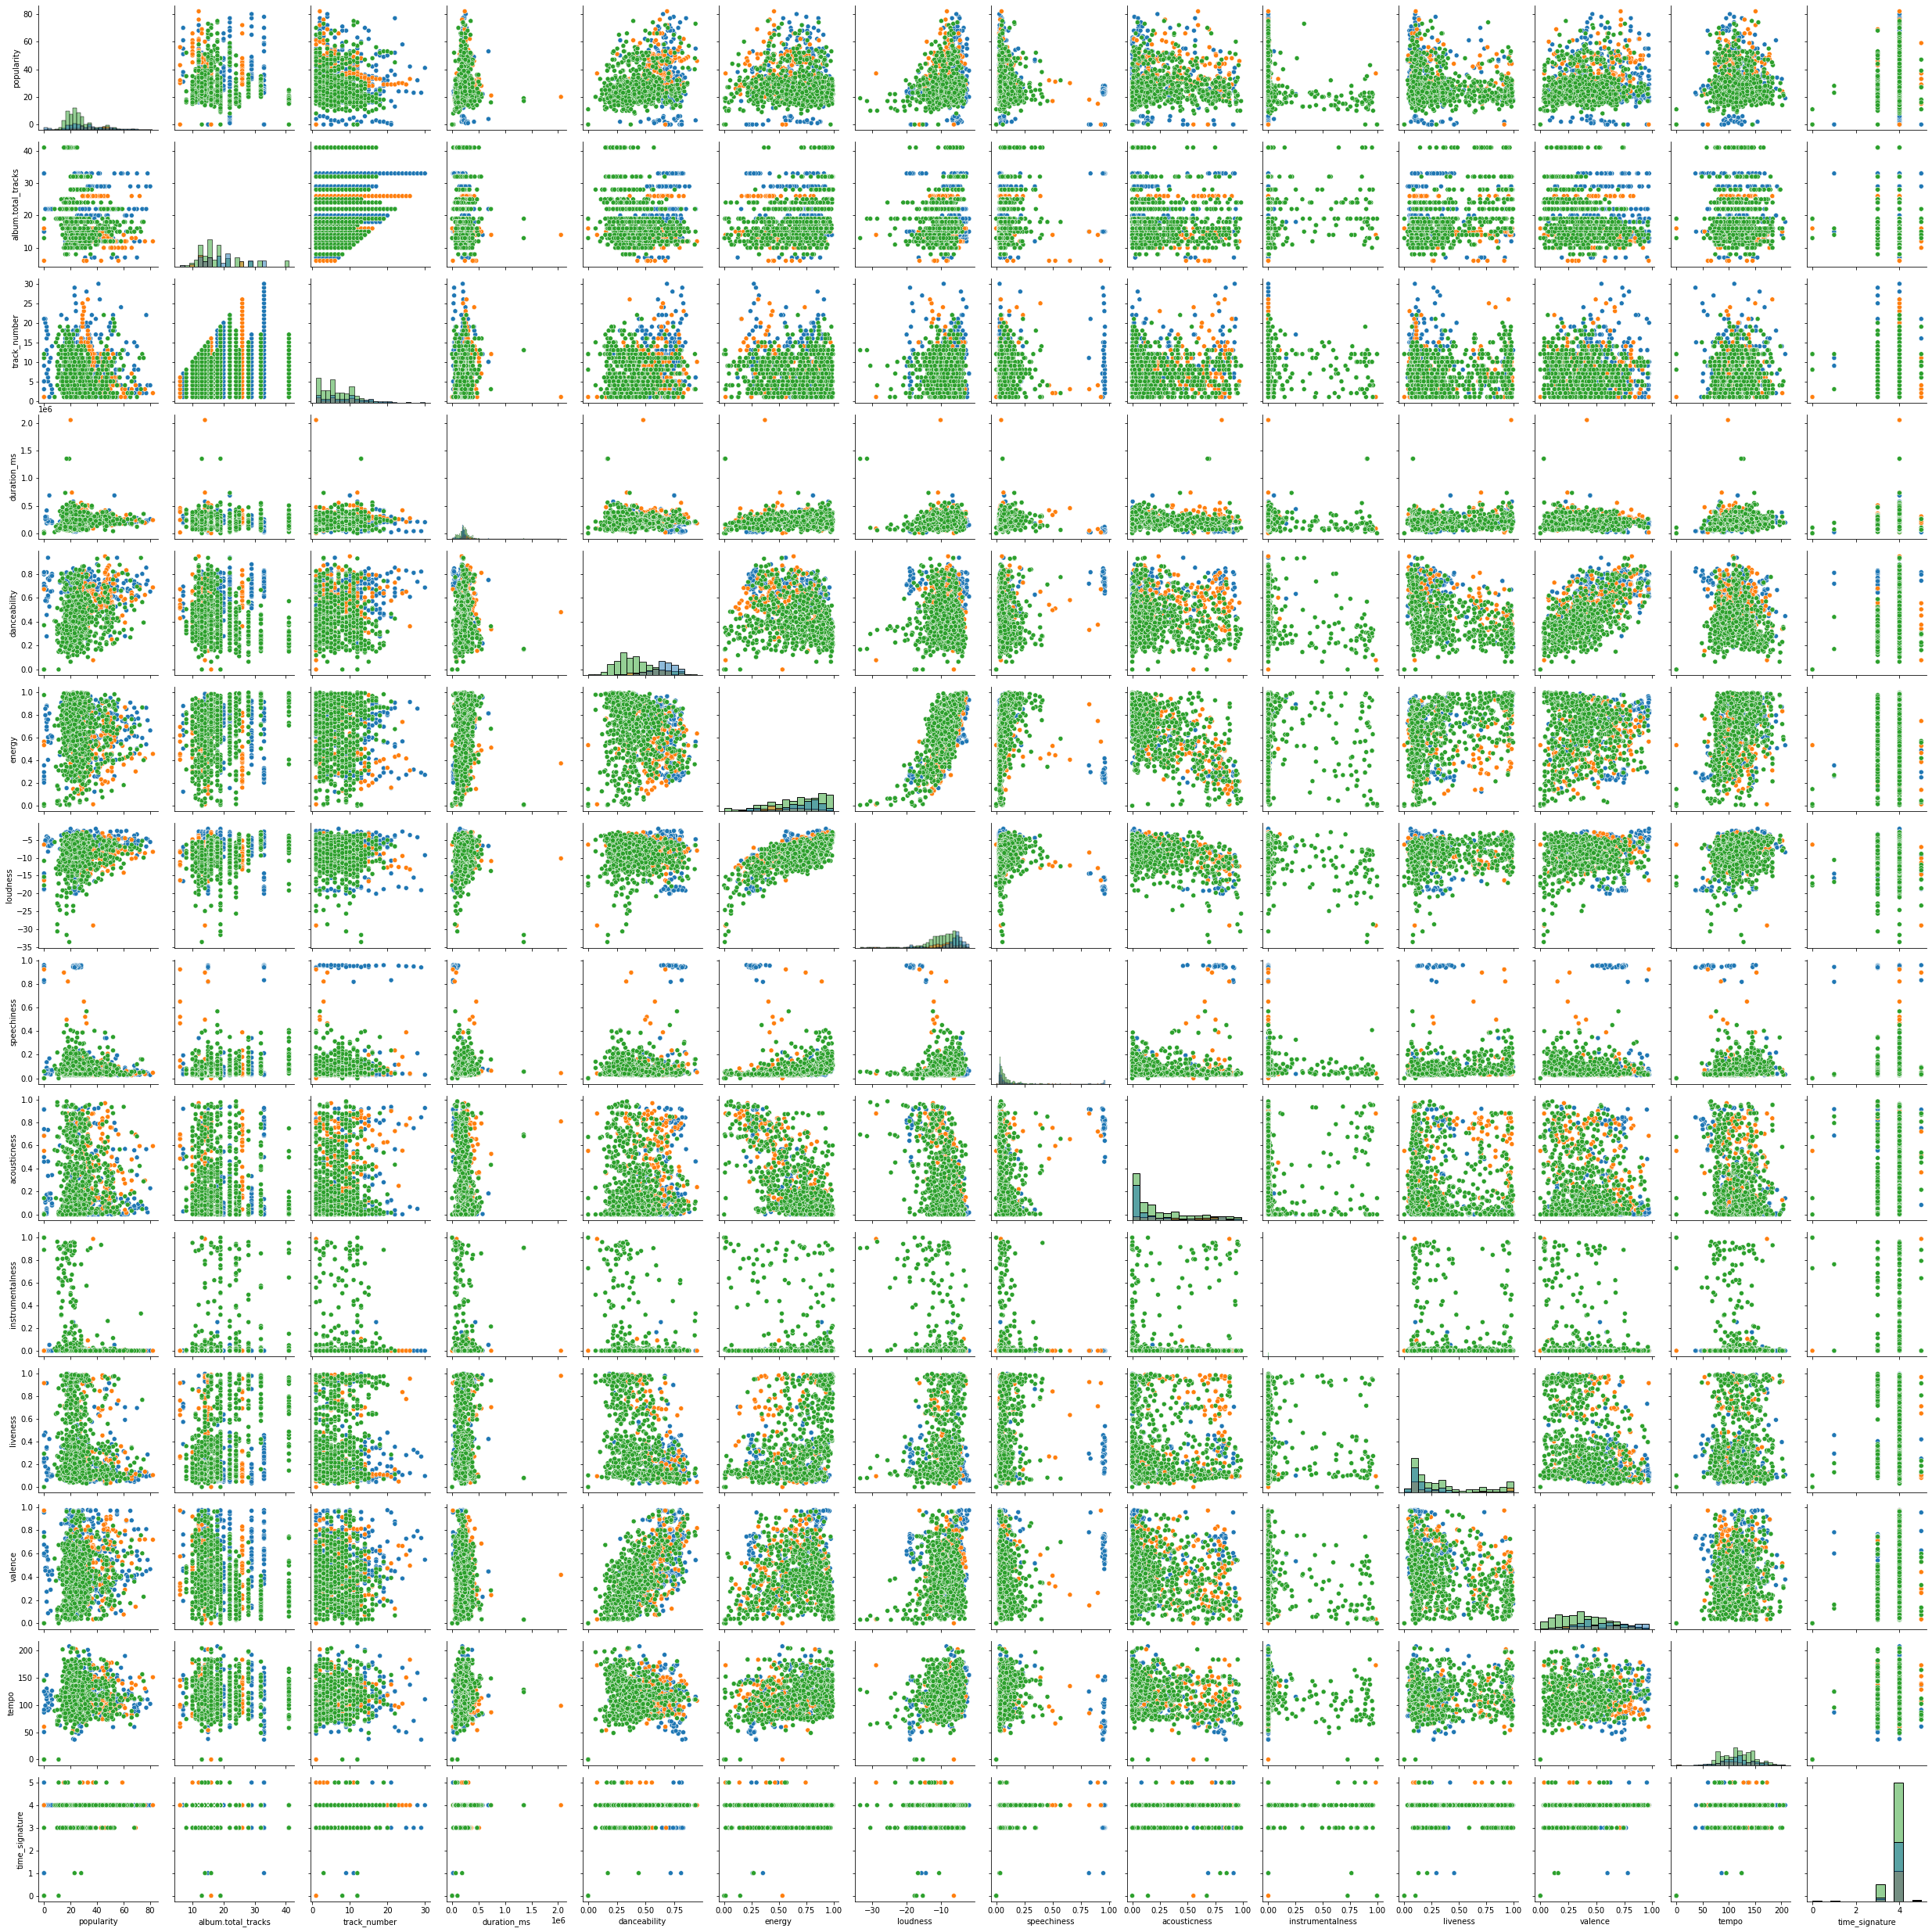

In [10]:
# visualisasi data dengan scatterplot matrices
g = sns.PairGrid(data, hue = 'artist')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
plt.show()


# 3. Analisis lainnya

Jawablah pertanyaan berikut dengan menggunakan sebuah code atau visualisasi data!

In [11]:
# Lagu yang Paling Cocok untuk Berdansa pada Masing-Masing Artis
# Petunjuk: 
#          1. Operasi group berdasarkan kolom "artist"
#          2. lakukan left atau right join pada dataset semula
max_vals = (data.groupby('artist', as_index=False)['danceability']
    .max()
    .sort_values("danceability", ascending=False)
)

pd.merge(max_vals, data, how = "left", on = ["artist","danceability"]).loc[:,["artist","danceability","name"]]

artist  danceability                                          name
0  Jason Mraz         0.946                                Hearing Double
1    Maroon 5         0.934             Help Me Out (with Julia Michaels)
2    Maroon 5         0.934             Help Me Out (with Julia Michaels)
3       Queen         0.933  Another One Bites The Dust - Remastered 2011

In [12]:
# lagu dengan durasi terlama pada masing-masing artis
# Petunjuk: 
#          1. Operasi group berdasarkan kolom "artist"
#          2. lakukan left atau right join pada dataset semula
max_vals = (data.groupby('artist', as_index=False)['duration_ms']
    .max()
    .sort_values("duration_ms", ascending=False)
)

pd.merge(max_vals, data, how = "left", on = ["artist","duration_ms"]).loc[:,["artist","duration_ms","name"]]

artist  duration_ms                         name
0  Jason Mraz      2054800  Welcome to Schubas - Medley
1       Queen      1354933   Untitled - Remastered 2011
2    Maroon 5       688741                      Closure
3    Maroon 5       688741                      Closure

In [14]:
# lagu paling sedih pada masing-masing artis
# Petunjuk: 
#          1. Operasi group berdasarkan kolom "artist"
#          2. lakukan left atau right join pada dataset semula
min_vals = (data.groupby('artist', as_index=False)['valence']
    .min()
    .sort_values("valence", ascending=False)
)

pd.merge(min_vals, data, how = "left", on = ["artist","valence"]).loc[:,["artist","valence","name"]]

artist  valence                                               name
0    Maroon 5   0.0738                 Makes Me Wonder - Just Blaze Remix
1  Jason Mraz   0.0000  Intro - Live at the Charter One Pavilion, Chic...
2       Queen   0.0000                                               Yeah
3       Queen   0.0000                             Yeah - Remastered 2011
4       Queen   0.0000                   The Kiss (Aura Resurrects Flash)

In [16]:
# lagu paling keras terdengan pada masing-masing artis
# Petunjuk: 
#          1. Operasi group berdasarkan kolom "artist"
#          2. lakukan left atau right join pada dataset semula
min_vals = (data.groupby('artist', as_index=False)['loudness']
    .min()
    .sort_values("loudness", ascending=False)
)

pd.merge(min_vals, data, how = "left", on = ["artist","loudness"]).loc[:,["artist","loudness","name"]]

artist  loudness              name
0    Maroon 5   -20.066  Sad - Commentary
1  Jason Mraz   -28.959              Rise
2       Queen   -33.592          Untitled

In [17]:
# lagu paling lambat temponya
# Petunjuk: 
#          1. hitung nilai minimum variabel tempo
#          2. lakukan filter pada data semula menggunakan nilai minimum tersebut
max_vals = (data.groupby('artist', as_index=False)['tempo']
    .max()
    .sort_values("tempo", ascending=False)
)

pd.merge(max_vals, data, how = "left", on = ["artist","tempo"]).loc[:,["artist","tempo","name"]]

artist    tempo                                               name
0    Maroon 5  207.546               Out Of Goodbyes with Lady Antebellum
1       Queen  204.170           My Life Has Been Saved - Remastered 2011
2  Jason Mraz  202.013  Not so Usual - Live at the Eagles Ballroom, Mi...

In [20]:
# artis dengan jumlah lagu live concert terbanyak
# Petunjuk: 
#          1. Operasi group berdasarkan kolom "artist"
#          2. lakukan left atau right join pada dataset semula
(data.loc[data["liveness"]>= 0.8,:]
    .groupby('artist', as_index=False)["liveness"]
    .count()
    .sort_values("liveness", ascending=False)
)

artist  liveness
2       Queen       110
0  Jason Mraz        37
1    Maroon 5        21